<a href="https://colab.research.google.com/github/LelyshB/Pytorch_MultiClass/blob/main/Pytorch_MultiClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обычная multiclass модель на Pytorch
( just a warmup )



tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


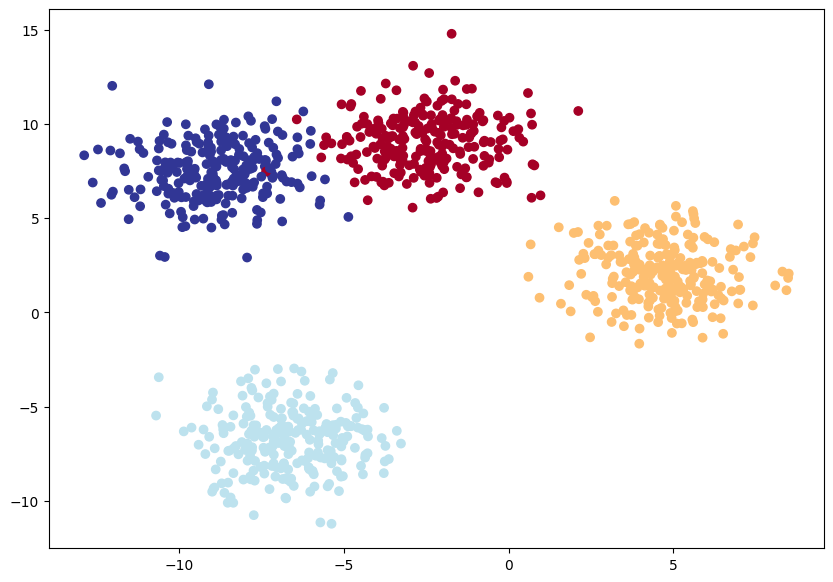

In [57]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5,
    random_state=RANDOM_SEED
)


X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

X_train, X_test, y_train, y_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [58]:
from torch import nn

class multiclassification(nn.Module):
  def __init__(self, in_features, out_features, hidden_units = 8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=in_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=out_features)
    )


  def forward(self, x):
    return self.linear_layer_stack(x)

model = multiclassification(in_features = NUM_FEATURES , out_features = NUM_CLASSES, hidden_units = 8)

model

multiclassification(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [59]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

In [60]:
model(X_train)[:5]

tensor([[-0.2405, -0.3291, -0.0949, -0.0621],
        [ 0.4736, -0.9594, -0.3905,  0.0175],
        [-0.1479, -1.1797, -0.3911,  0.8537],
        [-0.1539, -0.7724, -0.3499,  0.5639],
        [ 0.2495, -1.0433, -0.4717, -0.0181]], grad_fn=<SliceBackward0>)

In [61]:
y_logits = model(X_test)

y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.0919, -0.2576, -0.1179, -0.1350],
        [ 0.0322, -2.0932, -0.6848,  0.0386],
        [-0.1689, -0.8163, -0.3363,  0.5962],
        [-0.2004, -0.1536, -0.1816, -0.1559],
        [ 0.5042, -0.6030, -0.1644, -0.2293]], grad_fn=<SliceBackward0>)
tensor([[0.2646, 0.2242, 0.2578, 0.2534],
        [0.3825, 0.0457, 0.1868, 0.3850],
        [0.2213, 0.1158, 0.1872, 0.4756],
        [0.2432, 0.2548, 0.2478, 0.2542],
        [0.4305, 0.1423, 0.2206, 0.2067]], grad_fn=<SliceBackward0>)


In [62]:
def accuracy_fun(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [63]:
torch.manual_seed(232)

epochs = 500


for epoch in range(epochs):
    model.train()

    y_logits = model(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_func(y_logits, y_train)
    acc = accuracy_fun(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()
    with torch.inference_mode():
      test_logits = model(X_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      test_loss = loss_func(test_logits, y_test)
      test_acc = accuracy_fun(y_true=y_test, y_pred=test_pred)

    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.24258, Acc: 42.75% | Test Loss: 1.22807, Test Acc: 43.00%
Epoch: 20 | Loss: 1.17102, Acc: 53.37% | Test Loss: 1.15363, Test Acc: 53.50%
Epoch: 40 | Loss: 1.10841, Acc: 57.75% | Test Loss: 1.09030, Test Acc: 59.00%
Epoch: 60 | Loss: 1.05024, Acc: 61.62% | Test Loss: 1.03202, Test Acc: 61.50%
Epoch: 80 | Loss: 0.99595, Acc: 63.88% | Test Loss: 0.97794, Test Acc: 63.50%
Epoch: 100 | Loss: 0.94438, Acc: 67.00% | Test Loss: 0.92689, Test Acc: 64.50%
Epoch: 120 | Loss: 0.89509, Acc: 69.25% | Test Loss: 0.87813, Test Acc: 66.50%
Epoch: 140 | Loss: 0.84816, Acc: 71.38% | Test Loss: 0.83154, Test Acc: 71.00%
Epoch: 160 | Loss: 0.80360, Acc: 77.00% | Test Loss: 0.78728, Test Acc: 76.50%
Epoch: 180 | Loss: 0.76096, Acc: 82.38% | Test Loss: 0.74493, Test Acc: 82.50%
Epoch: 200 | Loss: 0.71970, Acc: 92.75% | Test Loss: 0.70403, Test Acc: 93.50%
Epoch: 220 | Loss: 0.67946, Acc: 93.75% | Test Loss: 0.66446, Test Acc: 95.50%
Epoch: 240 | Loss: 0.64000, Acc: 94.62% | Test Loss: 0.625

In [64]:
model.eval()
with torch.inference_mode():
    y_logits = model(X_test)


y_logits[:10]

tensor([[ 0.4436,  1.3608, -0.4630, -1.9176],
        [-0.2427, -4.3269, -1.1817,  1.6465],
        [-2.5997, -2.0036,  1.8088, -0.0585],
        [-0.3567,  1.1311, -0.5985, -1.6469],
        [ 2.1246, -0.6782, -1.9953, -1.1332],
        [-0.3400, -5.2786, -1.2606,  2.0015],
        [-2.5583, -1.3018,  1.0243, -0.6544],
        [ 1.6768, -1.2823, -1.9856, -0.6485],
        [-3.0076, -3.2474,  2.5619,  0.5549],
        [ 1.8467, -0.9078, -1.9529, -0.8883]])

In [65]:
y_pred_probs = torch.softmax(y_logits, dim=1)

y_preds = y_pred_probs.argmax(dim=1)

print(f"Predictions: {y_preds[:10]}\nLabels: {y_test[:10]}")
print(f"Test accuracy: {accuracy_fun(y_true=y_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.0%


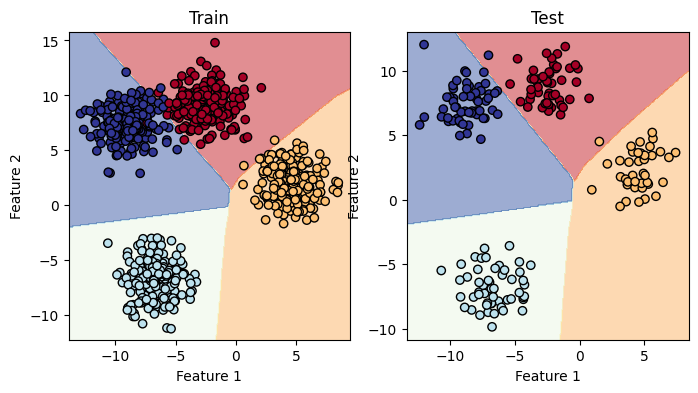

In [67]:
import numpy as np

def plot_decision_boundary(model, X, y, title=""):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 300)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 300)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])

    model.eval()
    with torch.no_grad():
        predictions = model(grid)
        _, predictions = predictions.max(1)

    z = predictions.reshape(xx.shape).detach().numpy()

    plt.contourf(xx, yy, z, cmap=plt.cm.RdYlBu, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plot_decision_boundary(model, X_train.numpy(), y_train.numpy(), title="Train")

plt.subplot(1, 2, 2)
plot_decision_boundary(model, X_test.numpy(), y_test.numpy(), title="Test")

plt.show()